In [23]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [24]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [44]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.colors as clrs

In [45]:
train_matrices_path = "/home/oala/Documents/experiments-hhi/uncertainty-quant/preliminary-experiments/context_encoder_snatched/ellipsoid_data_probabilistic_proppersplits_propperoutputs/matrices-train/epoch1050.pickle"
test_matrices_path = "/home/oala/Documents/experiments-hhi/uncertainty-quant/preliminary-experiments/context_encoder_snatched/ellipsoid_data_probabilistic_proppersplits_propperoutputs/matrices-test/epoch1050.pickle"

In [74]:
def make_plot(matrices_path, data_split, N):
    with open(matrices_path, 'rb') as handle:
        matrices = pickle.load(handle)
    imgs = matrices['imgs']
    masked_imgs = matrices['masked_imgs']
    gen_missing = matrices['gen_missing']
    missing_parts = matrices['missing_parts']
    out_b = matrices['out_b']
    
    y1 = (128// 2) - (32 // 2)
    y2 = y1 + 32
    x1 = (128 // 2) - (32 // 2)
    x2 = x1 + 32
    
    for i in range(N):
        #first image level
        r, c = 1, 3
        print('Image '+str(i)+' from '+data_split+' data')
        fig, axs = plt.subplots(r, c, figsize=(15,15))
        
        axs[0].imshow(np.squeeze(imgs[i, :,:]), vmin=0, vmax=1)
        axs[0].set_title('ref image')
        axs[0].axis('off')
        axs[1].imshow(np.squeeze(masked_imgs[i, :,:]), vmin=0, vmax=1)
        axs[1].set_title('masked image')
        axs[1].axis('off')
        filled_in = imgs[i].copy()
        filled_in[y1:y2, x1:x2, :] = gen_missing[i]
        axs[2].imshow(np.squeeze(filled_in), vmin=0, vmax=1)
        axs[2].set_title('masked image + mean pred image')
        axs[2].axis('off')
        #fig.savefig("images-test/%d.png" % epoch)
        plt.show()
        plt.close()

        #now patch level
        r, c = 1, 4
        fig, axs = plt.subplots(r, c, figsize=(15,15))
        
        axs[0].imshow(np.squeeze(missing_parts[i, :,:]), vmin=0, vmax=1)
        axs[0].set_title('ref patch')
        axs[0].axis('off')
        axs[1].imshow(np.squeeze(gen_missing[i, :,:]), vmin=0, vmax=1)
        axs[1].set_title('mean pred')
        axs[1].axis('off')
        axs[2].imshow(np.squeeze((gen_missing[i, :,:]-missing_parts[i, :,:])**2), norm=clrs.Normalize(vmin=None, vmax=None, clip=False))
        axs[2].set_title('(f(x)-x)**2')
        axs[2].axis('off')
        axs[3].imshow(np.squeeze(out_b[i, :,:]), norm=clrs.Normalize(vmin=None, vmax=None, clip=False))
        axs[3].set_title('var pred')
        axs[3].axis('off')
        #fig.savefig("images-test/%d.png" % epoch)
        plt.show()
        plt.close()

# Toy experiment

## Data
2000 images

N_train = 1600, N_val = 200, N_test = 200

Image res: 128x128

Masked patch: 32x32

## Optimization
Adam with standard parameters, adversarial learning turned off, only one dropout layer after the bottleneck, batch size = 64

## Loss
Power exponential distribution by (Gomez et al., 1998): $$a|\Sigma|^{-0.5}\text{exp}(-0.5((x-\mu)\Sigma^{-1}(x-\mu))^k)$$

Jochen Gast adaption, assuming diagonal $\Sigma$: minimize $\sum_j^d \log \beta_j + (\sum_j^d \frac{(y_j-\mu_j)^ 2}{\beta_j})^k$


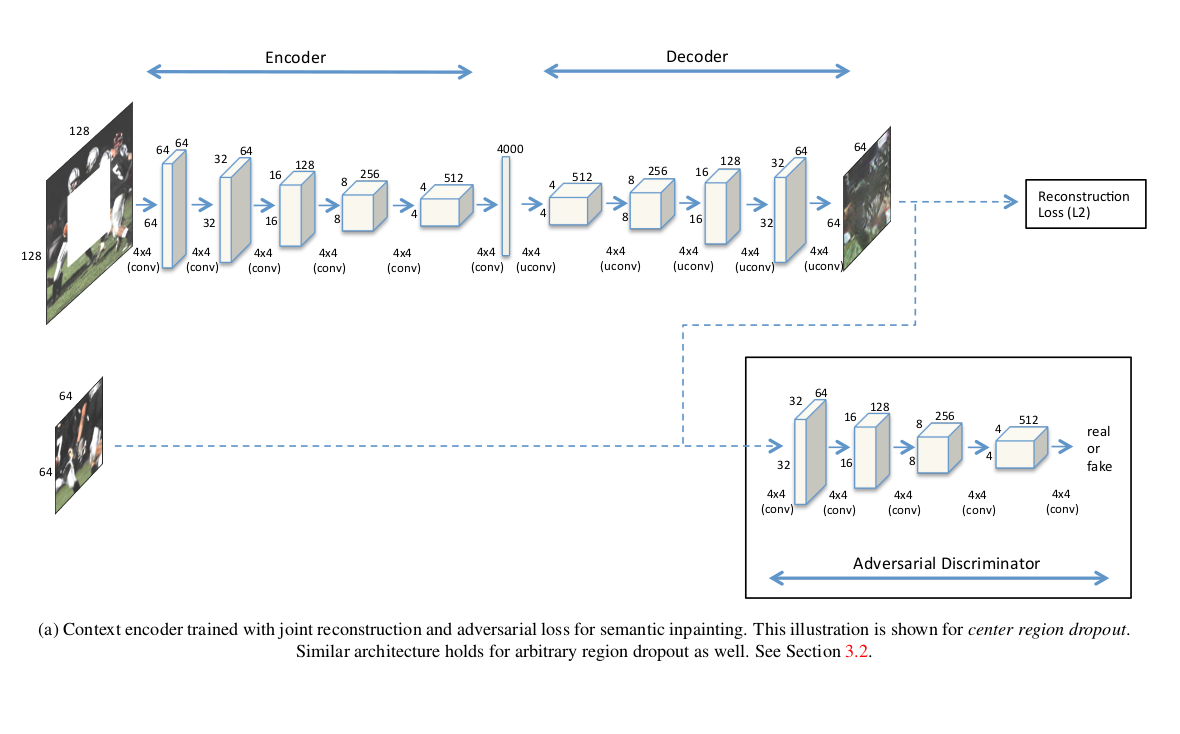

In [79]:
from IPython.display import Image
Image("inpainting-architecture.png")

Results on train test data after 1050 epochs with

NLL train: -4615.6

NLL val: -4592.5

Image 0 from train data


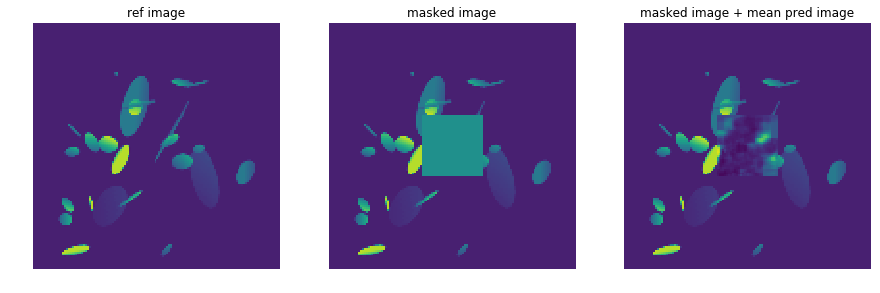

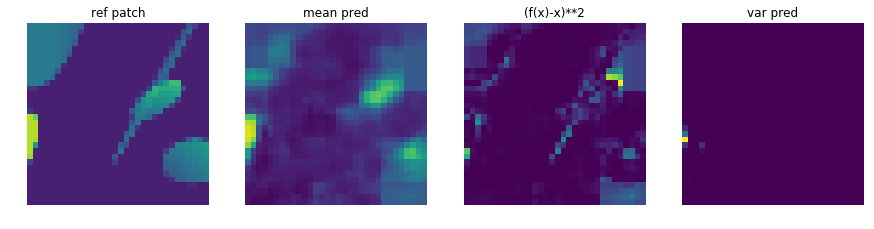

Image 1 from train data


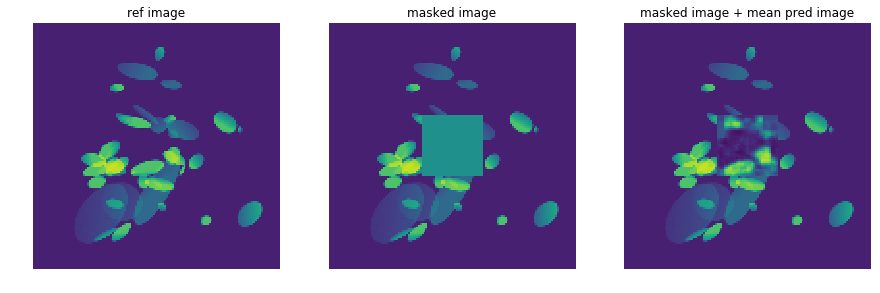

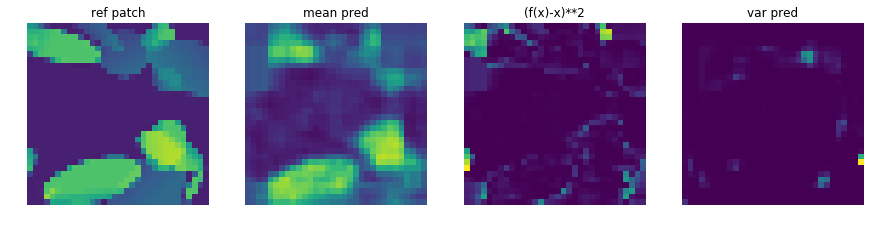

Image 2 from train data


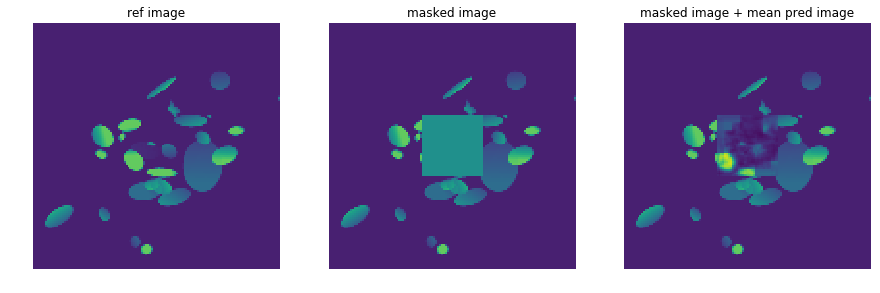

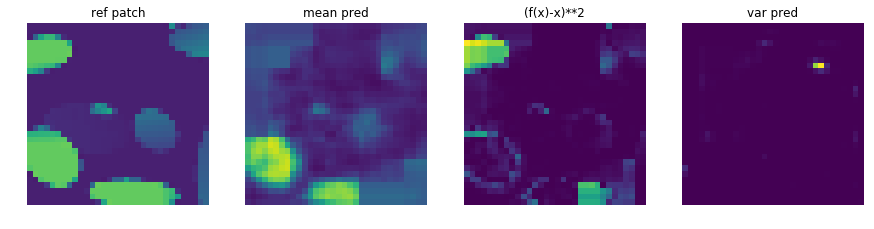

Image 3 from train data


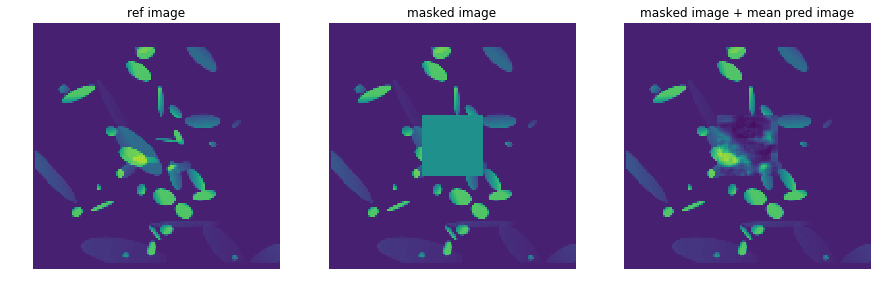

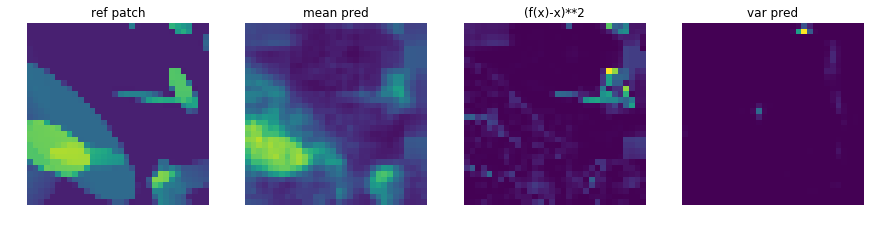

Image 4 from train data


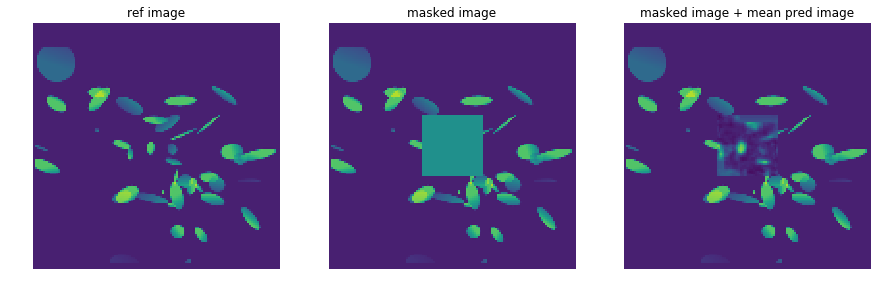

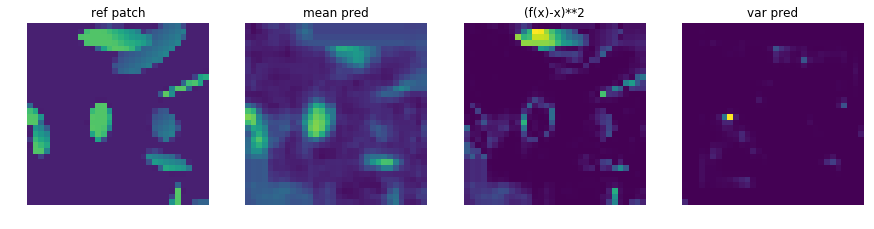

Image 5 from train data


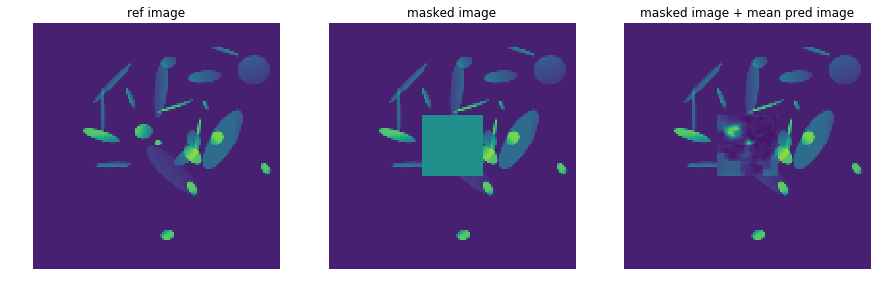

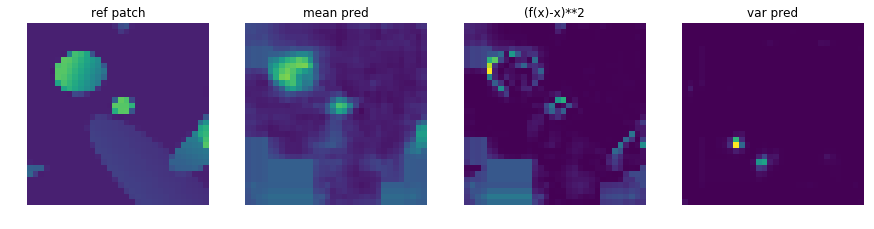

In [75]:
make_plot(train_matrices_path, 'train', 6)

Image 0 from test data


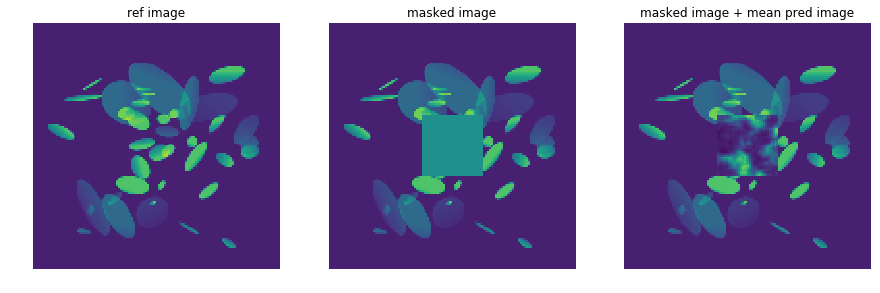

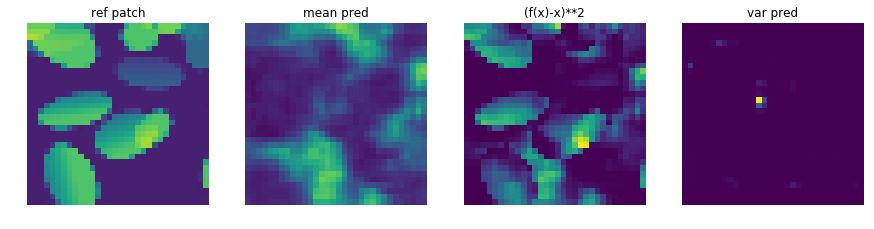

Image 1 from test data


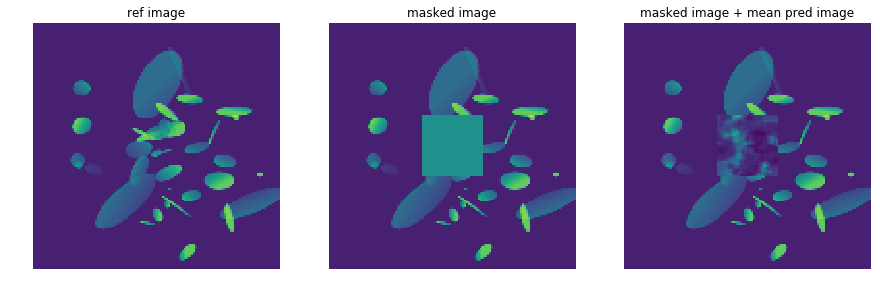

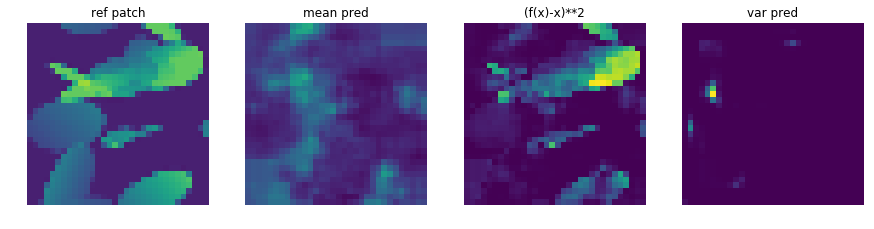

Image 2 from test data


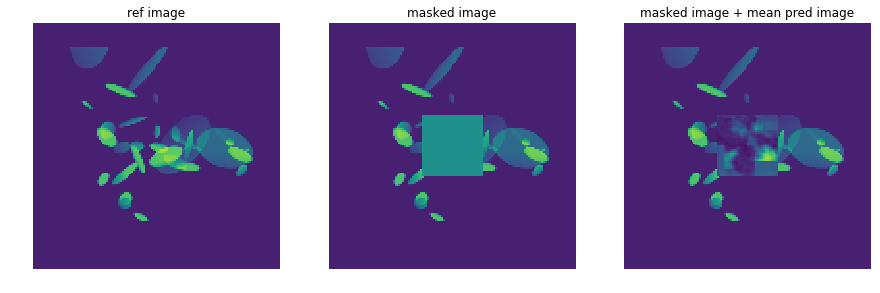

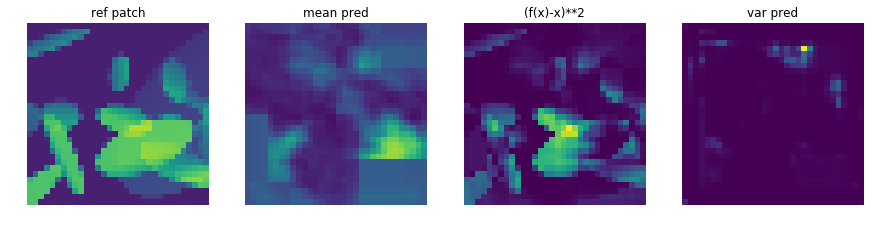

Image 3 from test data


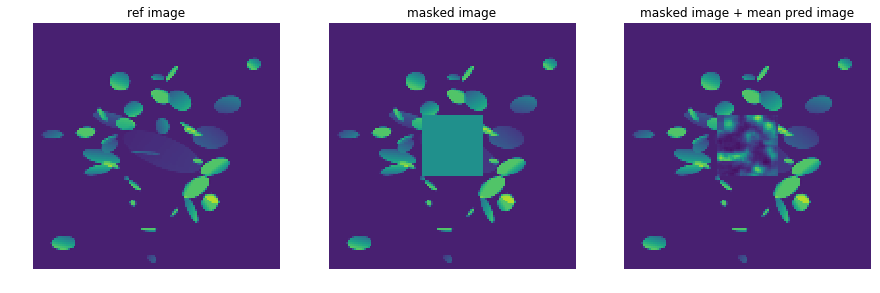

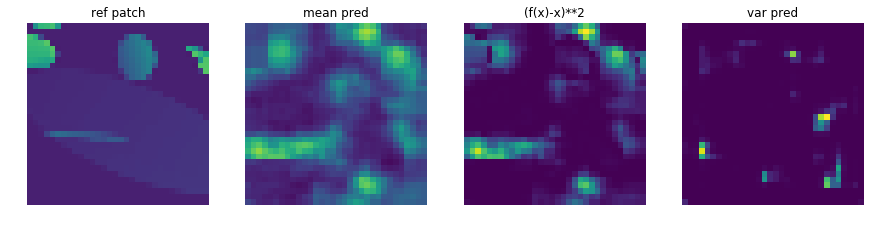

Image 4 from test data


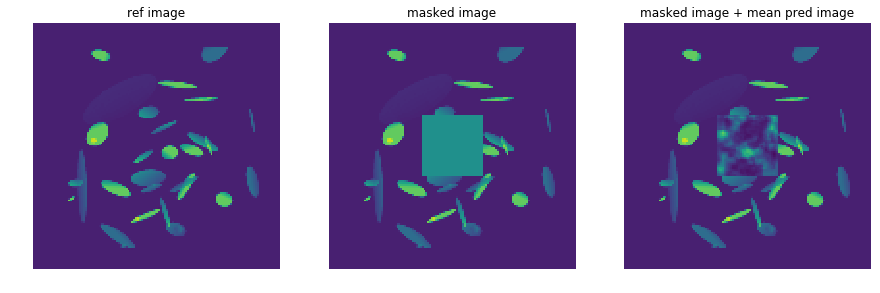

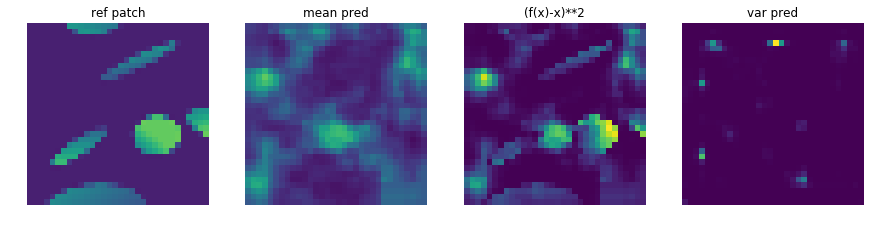

Image 5 from test data


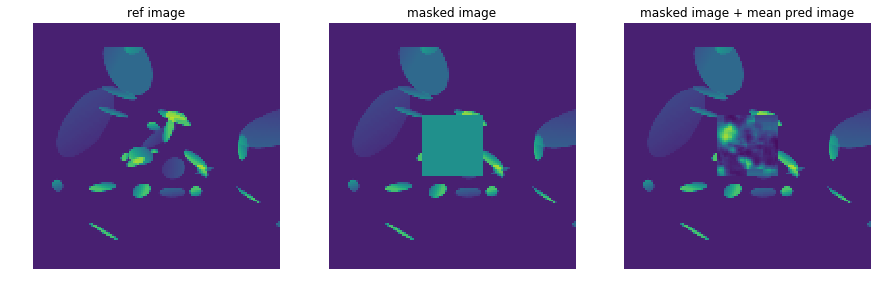

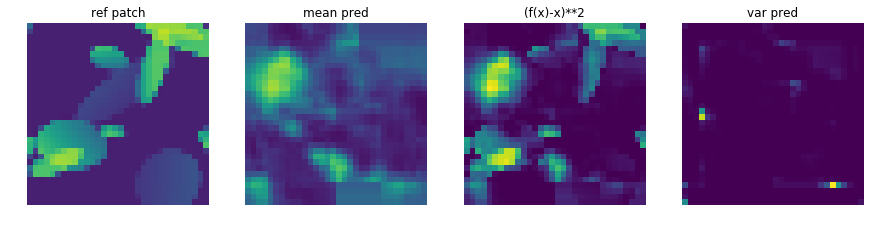

In [76]:
make_plot(test_matrices_path, 'test', 6)